# Basic Concept

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('~/cleaned.csv')

In [3]:
#split dataset into two sets: 1. feature set 2. class
cols=['EmergencyReferral', 'HighRisk', 'Flag_Mix','Flag_E', 'Flag']
X=df.drop(columns=cols)
#class
y=df["Flag"]
#X.head()

In [4]:
X.shape

(306719, 40)

# Check class distribution--class imbalance

In [5]:
# detect class imbalance
df["Flag"].value_counts()

0.0    294131
1.0     12588
Name: Flag, dtype: int64

# Split  dataset into training set and testing set to build classification models

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Apply undersampling method for imbalanced class --ratio=1:1


In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [8]:
#check the class distribution
import collections
print(sorted(collections.Counter(y_resampled).items()))

[(0.0, 8814), (1.0, 8814)]


# Apply random forest algorithm to select the important features

 1) SBP                                       0.146909
 2) DBP                                       0.100632
 3) BPAssessment                              0.077479
 4) GLU                                       0.055194
 5) BMI                                       0.039986
 6) TGS                                       0.037912
 7) Age                                       0.036652
 8) TCHOL                                     0.035132
 9) AST                                       0.034616
10) LDL                                       0.034277
11) ALT                                       0.034186
12) WEIGHT                                    0.032993
13) DMAssessment                              0.032265
14) AbdominalCir                              0.031557
15) METS_Risks                                0.029779
16) DiabetesStatusUsingGlucose                0.029630
17) TC:HDL_RATIO                              0.027932
18) HDL                                       0.027555
19) HEIGHT

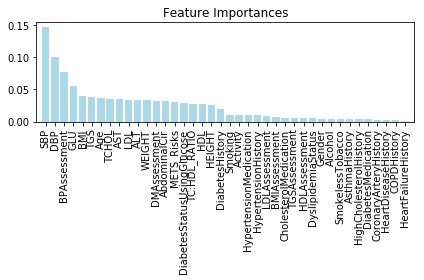

In [9]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns[:]

forest = RandomForestClassifier(n_estimators=10,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_resampled, y_resampled)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_resampled.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 41, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_resampled.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_resampled.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_resampled.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [10]:
for f in range(16):
    print("%2d) %-*s %f" % (f + 1, 16, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    import_f = []
for f in range(16):
    import_f.append(feat_labels[indices[f]])

    
print("\n the top 15 important features are %s" %import_f)


 1) SBP              0.146909
 2) DBP              0.100632
 3) BPAssessment     0.077479
 4) GLU              0.055194
 5) BMI              0.039986
 6) TGS              0.037912
 7) Age              0.036652
 8) TCHOL            0.035132
 9) AST              0.034616
10) LDL              0.034277
11) ALT              0.034186
12) WEIGHT           0.032993
13) DMAssessment     0.032265
14) AbdominalCir     0.031557
15) METS_Risks       0.029779
16) DiabetesStatusUsingGlucose 0.029630

 the top 15 important features are ['SBP', 'DBP', 'BPAssessment', 'GLU', 'BMI', 'TGS', 'Age', 'TCHOL', 'AST', 'LDL', 'ALT', 'WEIGHT', 'DMAssessment', 'AbdominalCir', 'METS_Risks', 'DiabetesStatusUsingGlucose']


In [11]:
X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [12]:
# use the top 16 important features as predictors
cols=['SBP', 'DBP', 'BPAssessment', 'GLU', 'BMI', 'TGS', 'Age', 'TCHOL', 'AST', 'LDL', 'ALT', 'WEIGHT', 'DMAssessment', 'AbdominalCir', 'METS_Risks', 'DiabetesStatusUsingGlucose']
X_resampled=X_resampled[cols]
X_test=X_test[cols]

In [13]:
# scale the features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_resampled = mms.fit_transform(X_resampled)
X_test = mms.fit_transform(X_test)

# Building classification models with default hyperparameter setting

# Logistic Regression

In [14]:
def lr_fit(X_resampled, y_resampled,X_test,y_test):
    lr = LogisticRegression(C=100, max_iter= 300,penalty= 'l1')
    clf = lr.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = lr.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

# Support Vector Machine

In [15]:
def svm_rbf_fit(X_resampled, y_resampled,X_test,y_test):
    svm_rbf = SVC(kernel='linear', C=10,gamma=0.001,probability=True)
    clf = svm_rbf.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = svm_rbf.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

# K Nearest Neighbors

In [16]:
def knn_fit(X_resampled, y_resampled,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 5,p=3,weights='distance')
    clf = knn.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    #y_score = clf.predict_proba(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_No_decision_function(y_test, clf_predicted)

# Decision Tree

In [17]:
def dt_fit(X_resampled, y_resampled,X_test,y_test):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    clf = dt.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Random Forest

In [18]:
def forest_fit(X_resampled, y_resampled,X_test,y_test):
    forest = RandomForestClassifier(n_estimators=13,random_state=0,n_jobs=-1)
    clf = forest.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Gaussian Naive Bayes

In [19]:
def nb_fit(X_resampled, y_resampled,X_test,y_test):
    nb = GaussianNB()
    clf = nb.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Gradient Boosting Tree

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
def Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test):
    clf = GradientBoostingClassifier().fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Model Evaluation Metrics

In [21]:
def ConfusionMatrix_Report(y_test,y_predicted):  
    confusion = confusion_matrix(y_test, y_predicted)
    ACC=accuracy_score(y_test, y_predicted)
    Precision=precision_score(y_test, y_predicted)
    Recall=recall_score(y_test, y_predicted)
    F1=f1_score(y_test, y_predicted)
    print('---Confusion Matrix---\n', confusion)
    print('\n   Accuracy: {:.2f}'.format(ACC))
    print('\n   Precision: {:.2f}'.format(Precision))
    print('\n   Recall: {:.2f}'.format(Recall))
    print('\n   F1: {:.2f}'.format(F1))
    print('---Classification Report---')
    print('\n   \n', 
    classification_report(y_test, y_predicted, target_names = ['not 1', '1']))
    print("Metric ")
    print('% 0.2f' % Recall,'% 0.2f' % F1,'% 0.2f' % Precision,'% 0.2f' % ACC)

In [22]:
def ROC_decison_function(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='riht', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [23]:
def ROC_No_decision_function(y_test, clf_predicted):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,clf_predicted)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(false_positive_rate, true_positive_rate,lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

# Fitting the models with default hyperparameter setting

-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[77418 10824]
 [ 1165  2609]]

   Accuracy: 0.87

   Precision: 0.19

   Recall: 0.69

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.88      0.93     88242
           1       0.19      0.69      0.30      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.59      0.78      0.62     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.69  0.30  0.19  0.87
 0.83


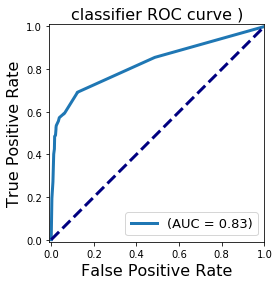

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[61550 26692]
 [  889  2885]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.76  0.17  0.10  0.70
 0.82


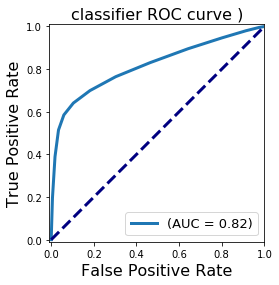

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[65522 22720]
 [  968  2806]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.74      0.85     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016

Metric 
 0.74  0.19  0.11  0.74
 0.82


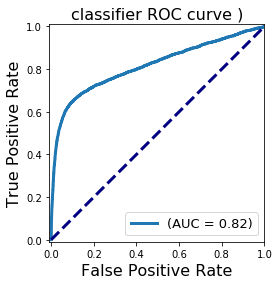

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[44905 43337]
 [  604  3170]]

   Accuracy: 0.52

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.51      0.67     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.52      0.52      0.52     92016
   macro avg       0.53      0.67      0.40     92016
weighted avg       0.95      0.52      0.65     92016

Metric 
 0.84  0.13  0.07  0.52
 0.82


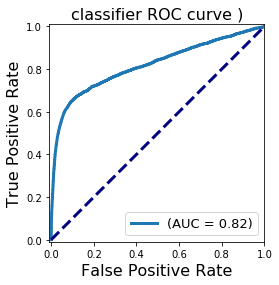

-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[69450 18792]
 [ 1093  2681]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.71

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.79      0.87     88242
           1       0.12      0.71      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.55      0.75      0.54     92016
weighted avg       0.95      0.78      0.85     92016

Metric 
 0.71  0.21  0.12  0.78
 0.75


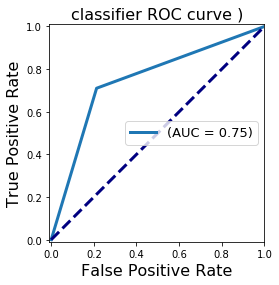

-------------------------------------------Naive Bayes--------------------------------------------
---Confusion Matrix---
 [[53641 34601]
 [  714  3060]]

   Accuracy: 0.62

   Precision: 0.08

   Recall: 0.81

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.61      0.75     88242
           1       0.08      0.81      0.15      3774

   micro avg       0.62      0.62      0.62     92016
   macro avg       0.53      0.71      0.45     92016
weighted avg       0.95      0.62      0.73     92016

Metric 
 0.81  0.15  0.08  0.62
 0.80


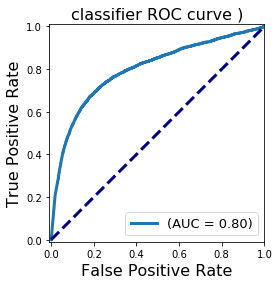

-------------------------------------------Gradient Boosting Tree--------------------------------------------
---Confusion Matrix---
 [[75003 13239]
 [ 1096  2678]]

   Accuracy: 0.84

   Precision: 0.17

   Recall: 0.71

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.85      0.91     88242
           1       0.17      0.71      0.27      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.58      0.78      0.59     92016
weighted avg       0.95      0.84      0.89     92016

Metric 
 0.71  0.27  0.17  0.84
 0.84


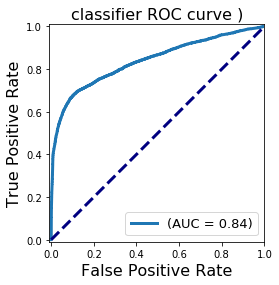

In [26]:
print("-------------------------------------------Decision Tree--------------------------------------------")
dt_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Random Forest--------------------------------------------")
forest_fit(X_resampled, y_resampled,X_test,y_test)
print("--------------------------------------------Logistic Regression---------------------------------------")
lr_fit(X_resampled, y_resampled,X_test,y_test)
print("--------------------------------------------Support Vector Machine-------------------------------------")
svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------KNN--------------------------------------------")
knn_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Naive Bayes--------------------------------------------")
nb_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Gradient Boosting Tree--------------------------------------------")
Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)

# Hyperparameter Tuning for SVM 

In [27]:
clf = SVC()
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel' : ['linear', 'rbf'],
          'C':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('testing set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_f1 = grid_clf_f1.decision_function(X_test) 


print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (accuracy):  0.7914113909689131
testing set AUC:  0.827429094367807
Grid best parameter (max. AUC):  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Grid best score (AUC):  0.8379510797461122
Grid best parameter (max. F1):  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Grid best score F1:  0.7684998302003522


# Hyperparameter Tuning for Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
    
clf= LogisticRegression()
grid_values = {'max_iter': [100, 200, 300, 400,500,600,700,800,900,1000],'C': [0.001,0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l1', 'l2']}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Testing set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_f1 = grid_clf_f1.decision_function(X_test) 


print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Grid best score (accuracy):  0.7738257317903335
Testing set AUC:  0.8156748015078782
Grid best parameter (max. AUC):  {'C': 1000, 'max_iter': 400, 'penalty': 'l1'}
Grid best score (AUC):  0.8303963788038802
Grid best parameter (max. F1):  {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Grid best score F1:  0.7614164107928134


# Hyperparameter Tuning for KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11], 
          'p':[1, 2, 3, 4],'weights':['uniform', 'distance']}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 
 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 

print('test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 



print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Grid best score (accuracy):  0.7836963921034718
validate set AUC:  0.8115638782023136
Grid best parameter (max. AUC):  {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Grid best score (AUC):  0.8245560083492395
Grid best parameter (max. AUC):  {'n_neighbors': 11, 'p': 4, 'weights': 'uniform'}
Grid best score F1:  0.761630856992445


# Hyperparameter Tuning for Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

depth= np.arange(1,20,1)
clf = DecisionTreeClassifier()
grid_values = {'criterion':['entropy','gini'],'max_depth': depth}
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 



print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'criterion': 'gini', 'max_depth': 4}
Grid best score (accuracy):  0.7900499205808941
validate set AUC:  0.7170943041361889
Grid best parameter (max. AUC):  {'criterion': 'gini', 'max_depth': 6}
Grid best score (AUC):  0.8364009281601167
Grid best parameter (max. AUC):  {'criterion': 'gini', 'max_depth': 4}
Grid best score F1:  0.7672423256553255


# Hyperparameter Tuning for Random Forest

In [28]:
clf =  RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 40, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
grid_values = random_grid
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
#y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
#y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


#print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)



Grid best parameter (max. accuracy):  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
Grid best score (accuracy):  0.7926594054912639
Grid best parameter (max. AUC):  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 35}
Grid best score (AUC):  0.8516473227891205


# Hyperparameter Tuning for Gradient Boosting Tree

In [31]:
#'min_samples_leaf':range(100,1000,10),'max_features':range(2,16,2),\'min_samples_split':range(1000,2000,10),\learning rate:
clf =  GradientBoostingClassifier()
grid_values={'n_estimators':range(10,100,10),'max_depth':range(3,10,2),\
        'learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5]}
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}
Grid best score (accuracy):  0.7926594054912639
Test set AUC:  0.8368160446232513
Grid best parameter (max. AUC):  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 60}
Grid best score (AUC):  0.8520553661535125


# Model Fitting with the optimal hyperparameters

# Logistic Regression Fitting

In [26]:
def lr_fit(X_resampled, y_resampled,X_test,y_test):
    lr = LogisticRegression(C=1000, max_iter= 600,penalty= 'l1')
    clf = lr.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score_lr = lr.decision_function(X_test)
    ROC_decison_function(y_test, y_score=y_score_lr)
    X_resampled=pd.DataFrame(X_resampled,columns=cols)
    print("no inverse scaled coefficient for lr:",clf.coef_)
    feature_importance = abs(clf.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X_resampled.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    plt.tight_layout()   
    plt.show()

---Confusion Matrix---
 [[66228 22014]
 [  984  2790]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.74

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.75      0.85     88242
           1       0.11      0.74      0.20      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.74  0.20  0.11  0.75
 0.82


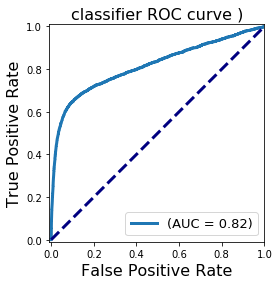

no inverse scaled coefficient for lr: [[ 9.86320883e+00  3.85559078e+00  8.21643447e-01  1.33672926e+01
   1.72120108e+02  1.63221618e+00 -1.45738272e+00 -3.47526885e-02
   4.64350770e+00  4.89055813e-01  2.46436058e+00 -6.28231609e+00
   1.09479282e+00  3.52197739e+00 -4.98009984e-01 -9.58200402e-01]]


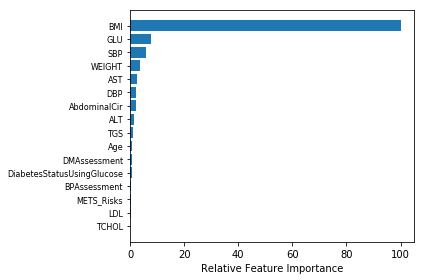

In [27]:
lr_fit(X_resampled, y_resampled,X_test,y_test)

# KNN Fitting

In [28]:
def knn_fit(X_resampled, y_resampled,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 11,p=2,weights='distance')
    clf = knn.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_No_decision_function(y_test, clf_predicted)

---Confusion Matrix---
 [[74487 13755]
 [ 1137  2637]]

   Accuracy: 0.84

   Precision: 0.16

   Recall: 0.70

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.16      0.70      0.26      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.57      0.77      0.59     92016
weighted avg       0.95      0.84      0.88     92016

Metric 
 0.70  0.26  0.16  0.84
 0.77


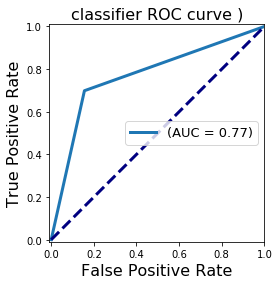

In [29]:
knn_fit(X_resampled, y_resampled,X_test,y_test)

# Decision Tree Fitting

In [32]:
def dt_fit(X_resampled, y_resampled,X_test,y_test):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
    clf = dt.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)
    print("feature importance for dt:",clf.feature_importances_)
    feature_importance=clf.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    X_resampled=pd.DataFrame(X_resampled,columns=cols)
    featax.set_yticklabels(np.array(X_resampled.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    plt.tight_layout()   
    plt.show()

---Confusion Matrix---
 [[78463  9779]
 [ 1294  2480]]

   Accuracy: 0.88

   Precision: 0.20

   Recall: 0.66

   F1: 0.31
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.93     88242
           1       0.20      0.66      0.31      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.59      0.77      0.62     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.66  0.31  0.20  0.88
 0.80


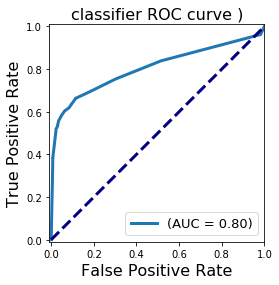

feature importance for dt: [0.03351972 0.03949087 0.58726905 0.04294112 0.0045392  0.00544861
 0.00739142 0.00179865 0.01110575 0.00113742 0.00461459 0.00071809
 0.23596268 0.00851958 0.01554324 0.        ]


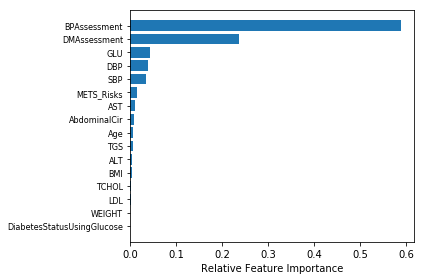

In [33]:
dt_fit(X_resampled, y_resampled,X_test,y_test)

# Random Forest Fitting

In [34]:
def forest_fit(X_resampled, y_resampled,X_test,y_test):
    forest = RandomForestClassifier(bootstrap= True, max_depth=10, max_features='sqrt', n_estimators=35,n_jobs=-1)
    clf = forest.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

---Confusion Matrix---
 [[77532 10710]
 [ 1171  2603]]

   Accuracy: 0.87

   Precision: 0.20

   Recall: 0.69

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.88      0.93     88242
           1       0.20      0.69      0.30      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.59      0.78      0.62     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.69  0.30  0.20  0.87
 0.84


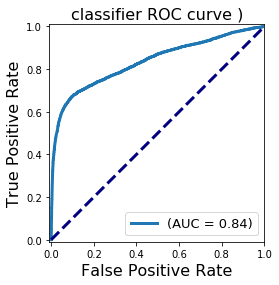

In [35]:
forest_fit(X_resampled, y_resampled,X_test,y_test)

# Gradient Boosting Tree Fitting

---Confusion Matrix---
 [[72997 15245]
 [ 1046  2728]]

   Accuracy: 0.82

   Precision: 0.15

   Recall: 0.72

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.83      0.90     88242
           1       0.15      0.72      0.25      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.57      0.78      0.58     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.72  0.25  0.15  0.82
 0.84


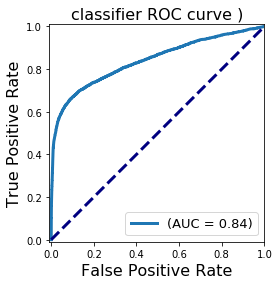

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
ROC_decison_function(y_test, y_score)

In [37]:
def feature_importances_(self):
    total_sum = np.zeros((self.n_features, ), dtype=np.float64)
    for tree in self.estimators_:
        total_sum += tree.feature_importances_ 
    importances = total_sum / len(self.estimators_)
    return importances

 1) BPAssessment      0.524155
 2) DMAssessment      0.196121
 3) SBP               0.074320
 4) GLU               0.063905
 5) DBP               0.051822
 6) METS_Risks        0.023162
 7) BMI               0.012031
 8) Age               0.010206
 9) AST               0.009875
10) ALT               0.007569
11) TGS               0.007416
12) WEIGHT            0.006293
13) AbdominalCir      0.005133
14) LDL               0.004887
15) TCHOL             0.003098
16) DiabetesStatusUsingGlucose 0.000008


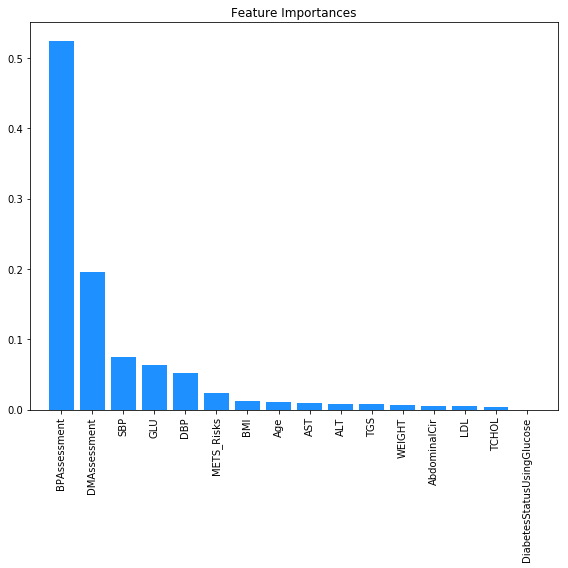

<Figure size 432x288 with 0 Axes>

In [38]:
clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
X_resampled= pd.DataFrame(X_resampled)
X_resampled.columns=cols
feat_labels=X_resampled.columns
for f in range(X_test.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 17, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(8,8), facecolor='white')
plt.title('Feature Importances')
plt.bar(range(X_resampled.shape[1]), 
        importances[indices],
        color='dodgerblue', 
        align='center')

plt.xticks(range(X_resampled.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_resampled.shape[1]])
plt.tight_layout()
plt.show()
plt.savefig("Feature_Important_GB")

# SVM Fitting

In [39]:
def svm_rbf_fit(X_resampled, y_resampled,X_test,y_test):
    svm_rbf = SVC(kernel='rbf', C=10,gamma=1,probability=True)
    clf = svm_rbf.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = svm_rbf.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

---Confusion Matrix---
 [[78831  9411]
 [ 1202  2572]]

   Accuracy: 0.88

   Precision: 0.21

   Recall: 0.68

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.94     88242
           1       0.21      0.68      0.33      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.60      0.79      0.63     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.68  0.33  0.21  0.88
 0.83


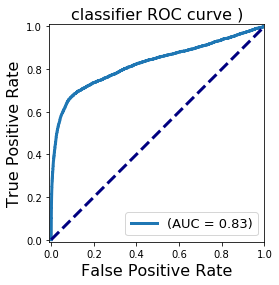

In [40]:
svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)

# Combine ROC curves to make evaluation

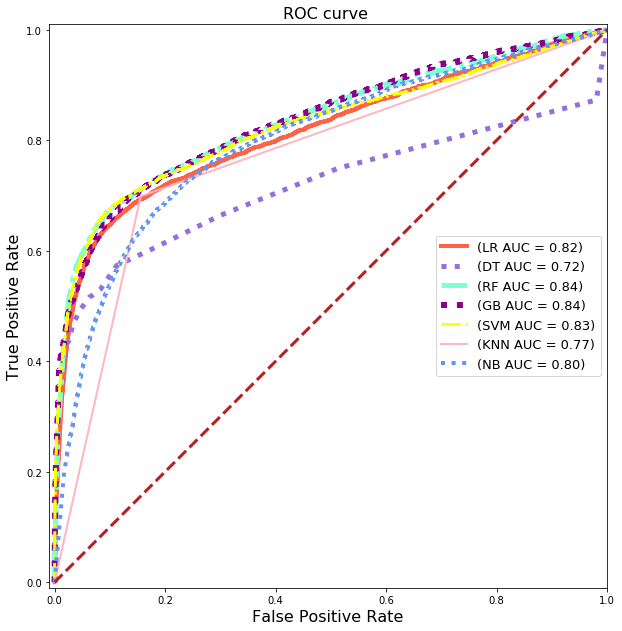

<Figure size 432x288 with 0 Axes>

In [41]:
#lr
lr = LogisticRegression(C=1000, max_iter= 600,penalty= 'l1')
clf_lr = lr.fit(X_resampled, y_resampled)
clf_predicted_lr = clf_lr.predict(X_test)
y_score_lr = lr.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
#dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
clf_dt = dt.fit(X_resampled, y_resampled)
clf_predicted_dt = clf_dt.predict(X_test)
y_score_dt = clf_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
#rf
forest = RandomForestClassifier(bootstrap= True, max_depth=10, max_features='sqrt', n_estimators=35,n_jobs=-1)
clf_rf = forest.fit(X_resampled, y_resampled)
clf_predicted_rf = clf_rf.predict(X_test)
y_score_rf= clf_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# gb
clf_gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted_gb = clf_gb.predict(X_test)
y_score_gb = clf_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
#svm
svm_rbf = SVC(kernel='rbf', C=10,gamma=1,probability=True)
clf_svm = svm_rbf.fit(X_resampled, y_resampled)
clf_predicted_svm = clf_svm.predict(X_test)
y_score_svm = svm_rbf.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
#knn
knn = KNeighborsClassifier(n_neighbors = 11,p=2,weights='distance')
clf_knn = knn.fit(X_resampled, y_resampled)
clf_predicted_knn = clf_knn.predict(X_test)
false_positive_rate_knn,true_positive_rate_knn,thresholds=roc_curve(y_test,clf_predicted_knn)
roc_auc_knn=auc(false_positive_rate_knn, true_positive_rate_knn)
#nb
nb = GaussianNB()
clf_nb = nb.fit(X_resampled, y_resampled)
clf_predicted_nb = clf_nb.predict(X_test)
y_score_nb = clf_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10,12))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=4, color='tomato',linestyle='-',label='(LR AUC = {:0.2f})'.format(roc_auc_lr))
plt.plot(fpr_dt, tpr_dt, lw=5,color='mediumpurple',linestyle=':',label='(DT AUC = {:0.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, lw=5,color='aquamarine',linestyle='-.',label='(RF AUC = {:0.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, lw=6,color='darkmagenta',linestyle=':',label='(GB AUC = {:0.2f})'.format(roc_auc_gb))
plt.plot(fpr_svm, tpr_svm, lw=3,color='yellow',linestyle='-.',label='(SVM AUC = {:0.2f})'.format(roc_auc_svm))
plt.plot(false_positive_rate_knn,true_positive_rate_knn, linestyle='-',lw=2,color='lightpink',label='(KNN AUC = {:0.2f})'.format(roc_auc_knn))
plt.plot(fpr_nb, tpr_nb, lw=4,color='cornflowerblue',linestyle=':',label='(NB AUC = {:0.2f})'.format(roc_auc_nb))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc='right', fontsize=13)
plt.plot([0, 1], [0, 1], color='firebrick', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
plt.savefig('AUC_Optimized_1.png')
